In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-data-set/student-por.csv


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline
mpl.style.use('seaborn')
mpl.rcParams["figure.facecolor"] ='#f6f5f5'

In [3]:
#reading raw data
data_raw = pd.read_csv('/kaggle/input/student-performance-data-set/student-por.csv')
#creating deep copy
df = data_raw.copy(deep=True)

#printing shape of the data and data info
print('Data Shape:',df.shape)
print(df.info())
display(df.head())

Data Shape: (649, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Catagorical Column's Values

------- columns school -------
There are 2 Unique values
5 of which are: ['GP' 'MS']

------- columns sex -------
There are 2 Unique values
5 of which are: ['F' 'M']

------- columns address -------
There are 2 Unique values
5 of which are: ['U' 'R']

------- columns famsize -------
There are 2 Unique values
5 of which are: ['GT3' 'LE3']

------- columns Pstatus -------
There are 2 Unique values
5 of which are: ['A' 'T']

------- columns Mjob -------
There are 5 Unique values
5 of which are: ['at_home' 'health' 'other' 'services' 'teacher']

------- columns Fjob -------
There are 5 Unique values
5 of which are: ['teacher' 'other' 'services' 'health' 'at_home']

------- columns reason -------
There are 4 Unique values
5 of which are: ['course' 'other' 'home' 'reputation']

------- columns guardian -------
There are 3 Unique values
5 of which are: ['mother' 'father' 'other']

------- columns schoolsup -------
There are 2 Unique values
5 of which are: ['yes' '

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


--------------- 
Pearson's Correlation


<AxesSubplot:>

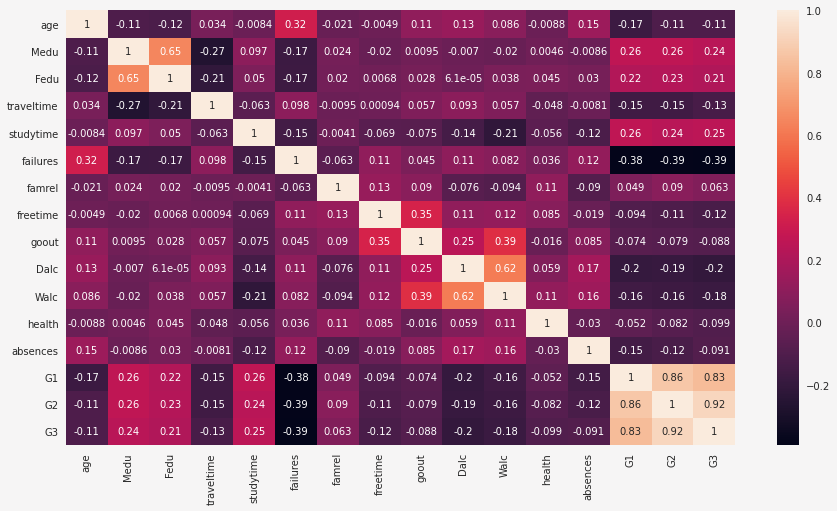

In [4]:
#taking alook on the catagorical columns
print('Catagorical Column\'s Values\n')
for col in df.select_dtypes(exclude=np.number).columns:
    unique = df[col].unique()
    print('-'*7,f'columns {col}','-'*7)
    print(f'There are {len(unique)} Unique values')
    print(f'5 of which are: {unique[:5]}\n')
    
#Numeric data statistics
print('-'*15,'\nNumeric Data Statistics\033[1;0m')
display(df.select_dtypes(include=np.number).describe())
print('-'*15,'\nPearson\'s Correlation')
plt.figure(figsize=(15,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True)

**The Data we have consists of 649 Entry and 33 Columns, Most of the columns are catagorical of ordinal variables, More information taken from dataset [link](https://www.kaggle.com/larsen0966/student-performance-data-set)**

**Columns:**
* **School:** student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* **Sex:** student's sex (binary: 'F' - female or 'M' - male)
* **Age:** student's age (numeric: from 15 to 22)
* **Address:** student's home address type (binary: 'U' - urban or 'R' - rural)
* **Famsize:** family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* **Pstatus:** parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* **Medu:** mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
* **Fedu:** father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
* **Mjob:** mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* **Fjob:** father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* **Reason:** reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* **Guardian:** student's guardian (nominal: 'mother', 'father' or 'other')
* **Traveltime:** home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* **Studytime:** weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* **Failures:** number of past class failures (numeric: n if 1<=n<3, else 4)
* **Schoolsup:** extra educational support (binary: yes or no)
* **Famsup:** family educational support (binary: yes or no)
* **Paid:** extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* **Activities:** extra-curricular activities (binary: yes or no)
* **Nursery:** attended nursery school (binary: yes or no)
* **Higher:** wants to take higher education (binary: yes or no)
* **Internet:** Internet access at home (binary: yes or no)
* **Romantic:** with a romantic relationship (binary: yes or no)
* **Famrel:** quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* **Freetime:** free time after school (numeric: from 1 - very low to 5 - very high)
* **Goout:** going out with friends (numeric: from 1 - very low to 5 - very high)
* **Dalc:** workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* **Walc:** weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* **Health:** current health status (numeric: from 1 - very bad to 5 - very good)
* **Absences:** number of school absences (numeric: from 0 to 93)
* **G1:** first period grade (numeric: from 0 to 20)
* **G2:** second period grade (numeric: from 0 to 20)
* **G3:** final grade (numeric: from 0 to 20, output target)

# Data Visualization

First to ease things alittle bit I'll divide columns into 3 list for Catagorical, Numerical, Continous data

In [5]:
#creating catagorical columns list and numeric columns list
cat_columns = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian',
               'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
num_columns = ['Medu','Fedu','traveltime','studytime','famrel','freetime','goout','Dalc','Walc','health']
cont_columns = ['age','failures','absences','G1','G2','G3']

# I-Univariat Data Visualization

In [6]:
def ncols_calculator(cols,nrows=3):
    '''
    Takes a list of columns and numbers row plots
    
    returns number of cols to be used in matplotlib.pyplot.subplots()
    and how many axes will be remained that need to be deleted
    '''
    n = len(cols)
    ncols = n//nrows
    if ncols*nrows < n:
        ncols+=1
    axdel = ncols*nrows-n
    return ncols,axdel


def bar_matrix(df,cols,nrows=3,annot=True,title='You Forget Your Title!'):
    '''
    df --> DataFrame
    cols --> List of Columns name to be plotted
    nrows --> number of nrows to split figure subplots default is 3
    annot --> Boolean to decide whether percentage of each bar annotation is desired
    title --> Figure title to be displayed
    
    Functions is designed to create one plot using
    sns.countplot for catagorical datatype columns
    
    '''
    ncols,axdel = ncols_calculator(cols)
    fig,axes = plt.subplots(ncols,nrows,figsize=(nrows*4,ncols*3),constrained_layout=True)
    plt.suptitle(f'{title}',size=20, fontweight='bold', fontfamily='serif')
    axes=axes.ravel()
    if axdel >0:
        for ax in range(1,axdel+1):
            axes[-ax].remove()
    for i in range(len(cols)):
        #creating plotting data information
        ax = axes[i]
        col = cols[i]
        #creating plot
        sns.countplot(x=col,data=df,color=sns.color_palette()[0],ax=ax)
        #adjusting plot
        ax.set_xlabel("")
        ax.set_title(col+'_Column')
        ax.set_ylim(0,max(ax.get_ylim())+max(ax.get_ylim())/8)
        #writing percentage over each bar
        if annot==True:
            for p in ax.patches:
                x = p.get_x()+0.2
                y = p.get_height()+1
                percentage = '{:.1f}%'.format(100*p.get_height()/df.shape[0])
                ax.annotate(percentage,(x,y))
                
def hist_violin(df,cols,title='You Forget Your Title!'):
    '''
    df --> DataFrame
    cols --> List of Columns name to be plotted
    title --> Figure title to be displayed
    
    Functions is designed to create two plots using
    sns.histplot and sns.violinplot for continuous datatype columns
    
    '''
    ncols = len(cols)
    fig,axes = plt.subplots(ncols,2,figsize=(12,ncols*2),constrained_layout=True)
    fig.suptitle(f'{title}',size=20, fontweight='bold', fontfamily='serif')
    #axes=axes.ravel()
    for i in range(len(cols)):
        ax = axes[i][0]
        col = cols[i]
        sns.histplot(x=col,data=df,color=sns.color_palette()[0],ax=ax,kde=True)
        #ax.set_xlabel("")
        ax.set_title(col+'_Distribution')
        ax = axes[i][1]
        sns.violinplot(x=col,data=df,color=sns.color_palette()[0],ax=ax)


**In This Section I'll try to explore each column individually to understand it's properties**

For catagorical columns I'll be creatin **countplot** and annot each bar percentage over it

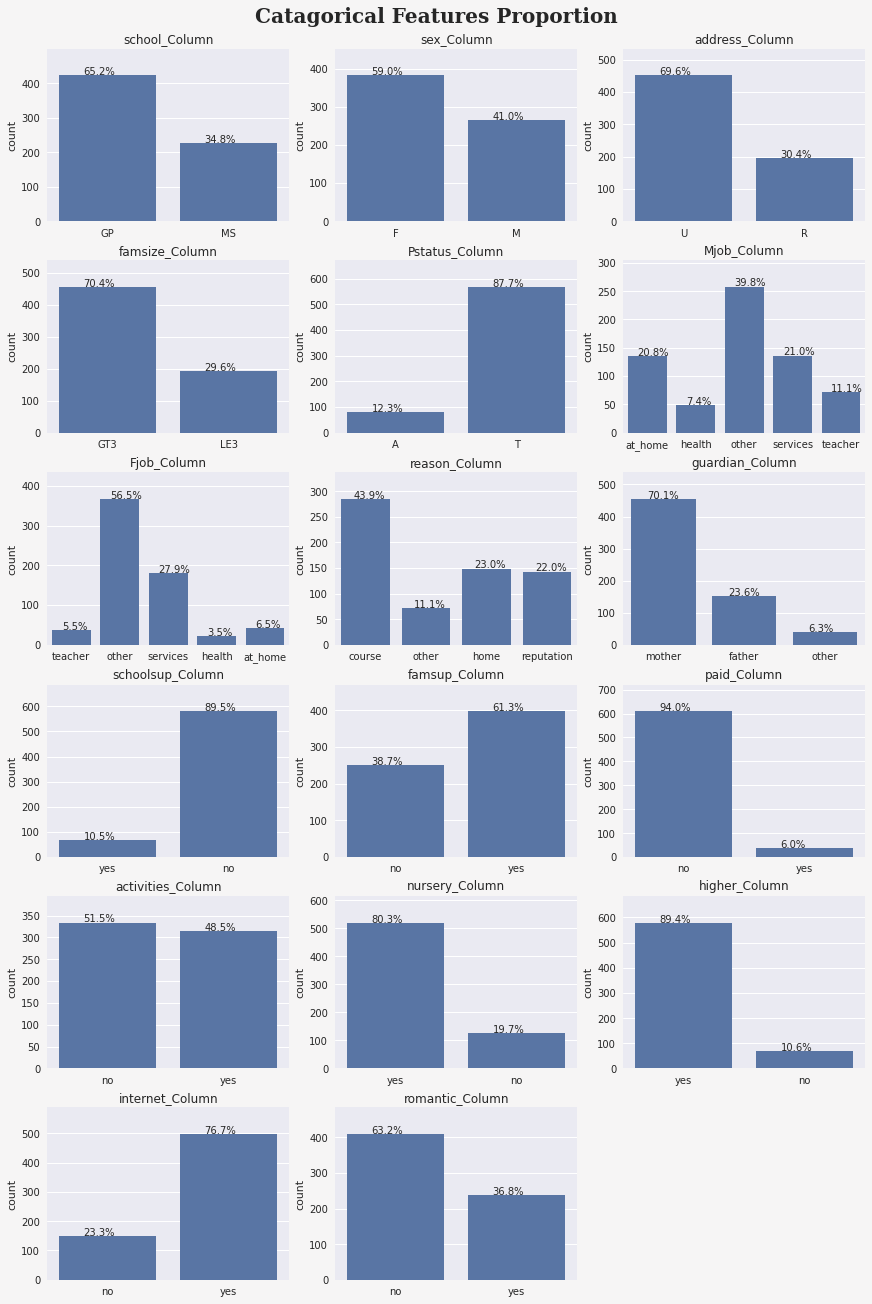

In [7]:
bar_matrix(df,cat_columns,annot=True,title='Catagorical Features Proportion')

I'll treat this numeric data as catagorical data as it is considered ordinal catagroical data but represented using numbers
So Iusing countplot for each column and using annotation to calculate each bar percentage

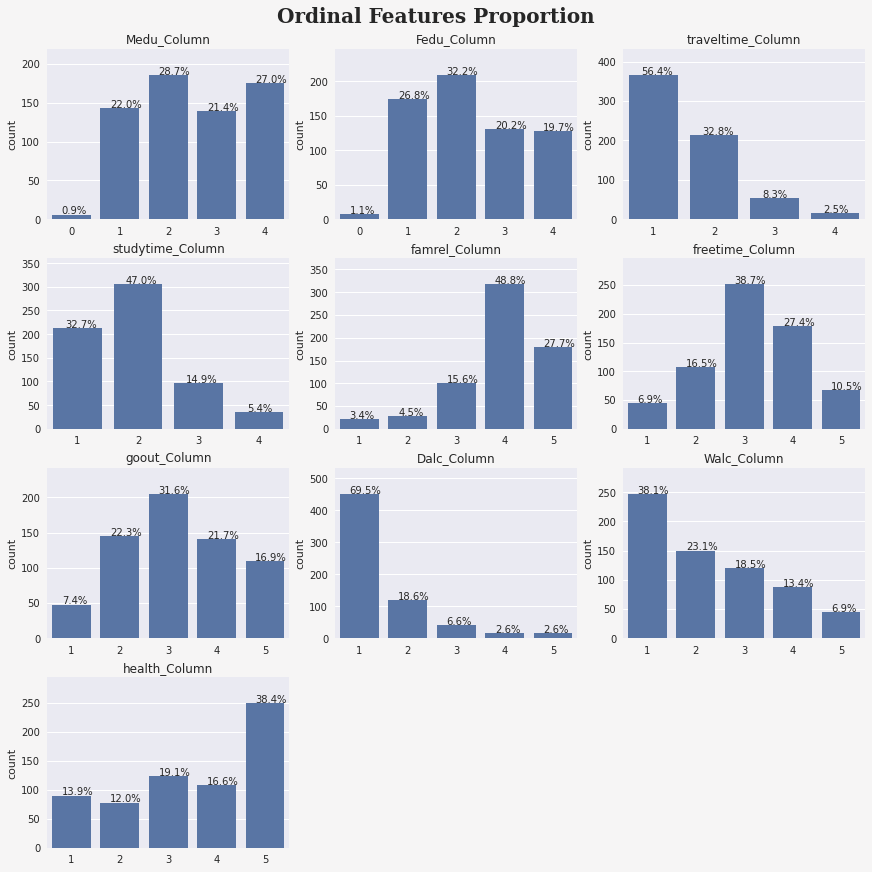

In [8]:
bar_matrix(df,num_columns,annot=True,title='Ordinal Features Proportion')

Here the data is discrete so, I'll treat it different. To learn more about continuse data I will creat multiple plot for each column each has
different information which we can learn from

I'll be Creating:
* kernel density estimate
* Violin Plot

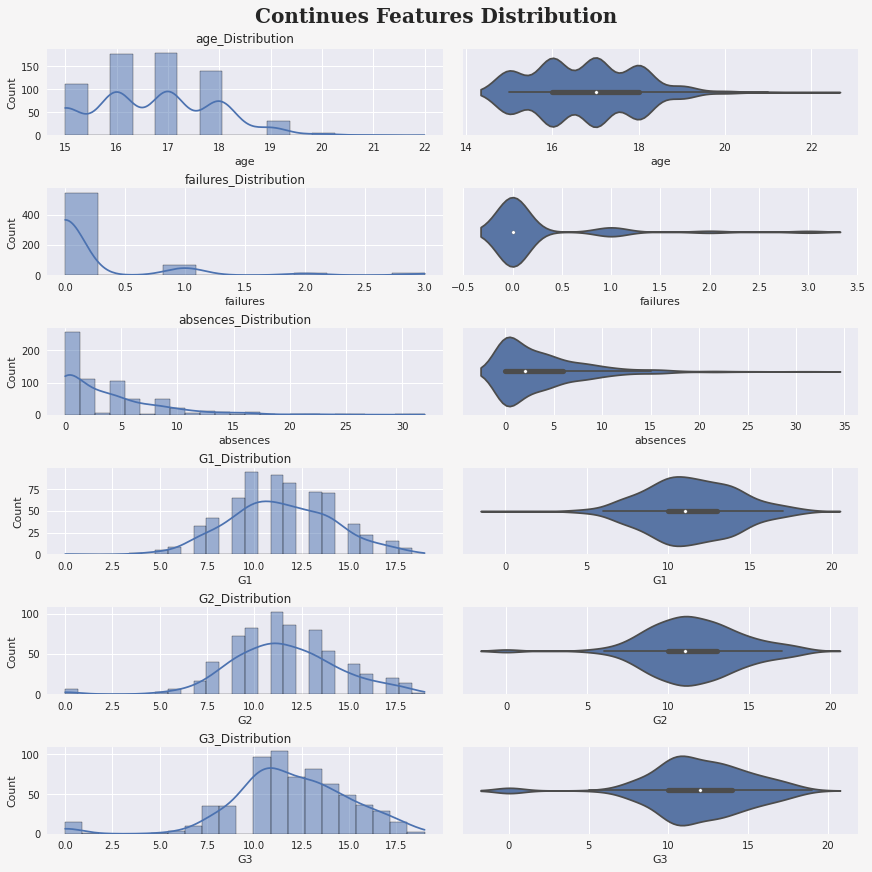

In [9]:
hist_violin(df,cont_columns,title='Continues Features Distribution')

**We can see that G1 and G2 has very similar distributions while G3 has a slightly different distribution**

# Bivariant Visualization

##### In this section my goal is to explore relationships of 2 columns with each other, our main focus are the exam result so I'll focus more in the relation ship of different columns with exam results,

**for simplicity sake I'll merge G1 and G2 into one column so I can explore relationships between the column and both exams at the same time**

**Also I will be adding Father and Mother's Education levels to one column**

In [10]:
#Creating different copy of the main dataframe to do my adjustment on it.
bi_df = df.copy()
bi_df['G1&G2'] = round((bi_df['G1'] + bi_df['G2'])/2,1)
bi_df['MFedu'] = bi_df['Medu'] + bi_df['Fedu']

bi_df.drop(labels=['G1','G2','Medu','Fedu'],inplace=True,axis=1)

#Updating my list of columns after the adjustments
bi_cat_columns = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian',
               'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
bi_num_columns = ['traveltime','studytime','famrel','freetime','goout','Dalc','Walc','health','MFedu']
bi_cont_columns = ['age','failures','absences','G3']

First, I'll explore G1&G2 score distribution for different columns

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


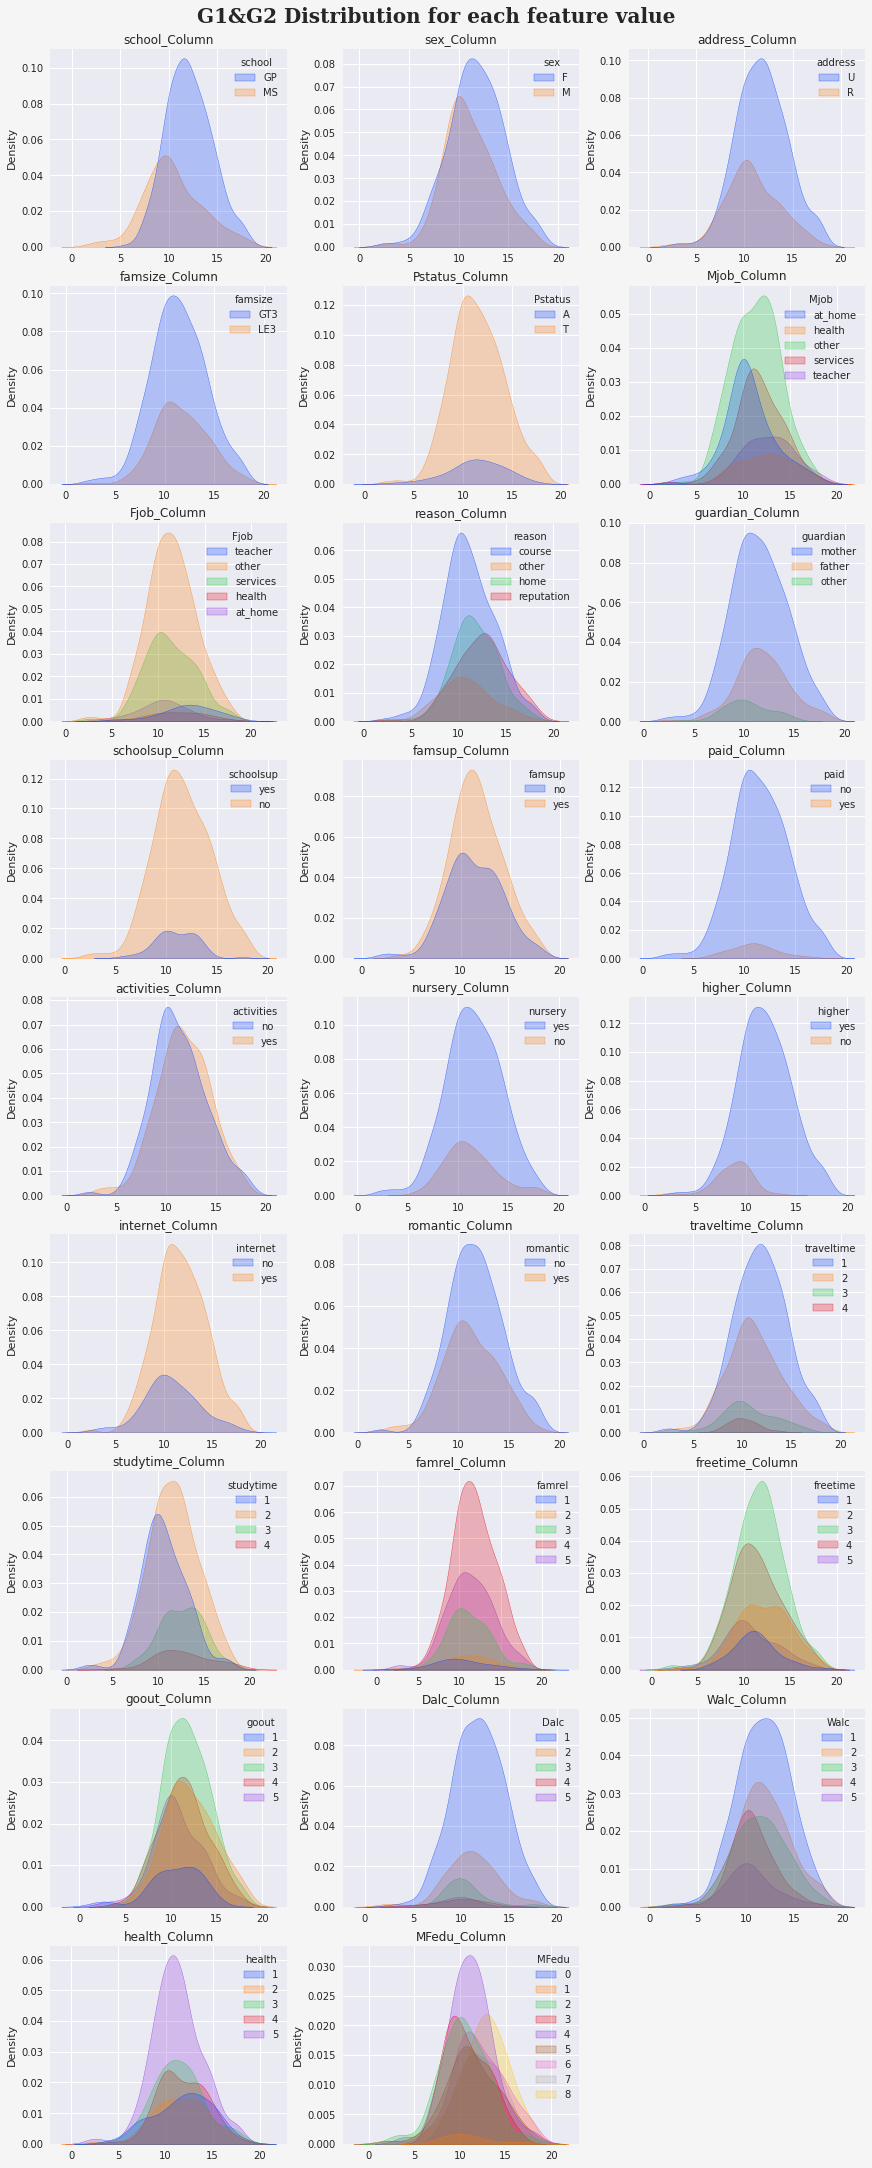

In [11]:
fig,axes = plt.subplots(9,3,figsize=(12,30),constrained_layout=True)
fig.suptitle('G1&G2 Distribution for each feature value',size=20, fontweight='bold', fontfamily='serif')
axes=axes.ravel()
axes[-1].remove()#removing non plotted axis

for i in range(len(bi_cat_columns+bi_num_columns)):
    #Creating plotting data variables
    ax = axes[i]
    col = (bi_cat_columns+bi_num_columns)[i]
    #plotting function
    sns.kdeplot(x='G1&G2',data=bi_df,hue=col,ax=ax,shade=True,palette=sns.color_palette('bright')[:len(bi_df[col].unique())])
    #Adjusting plot
    ax.set_xlabel("")
    ax.set_title(col+'_Column')

Comparing exam score mean for each columns

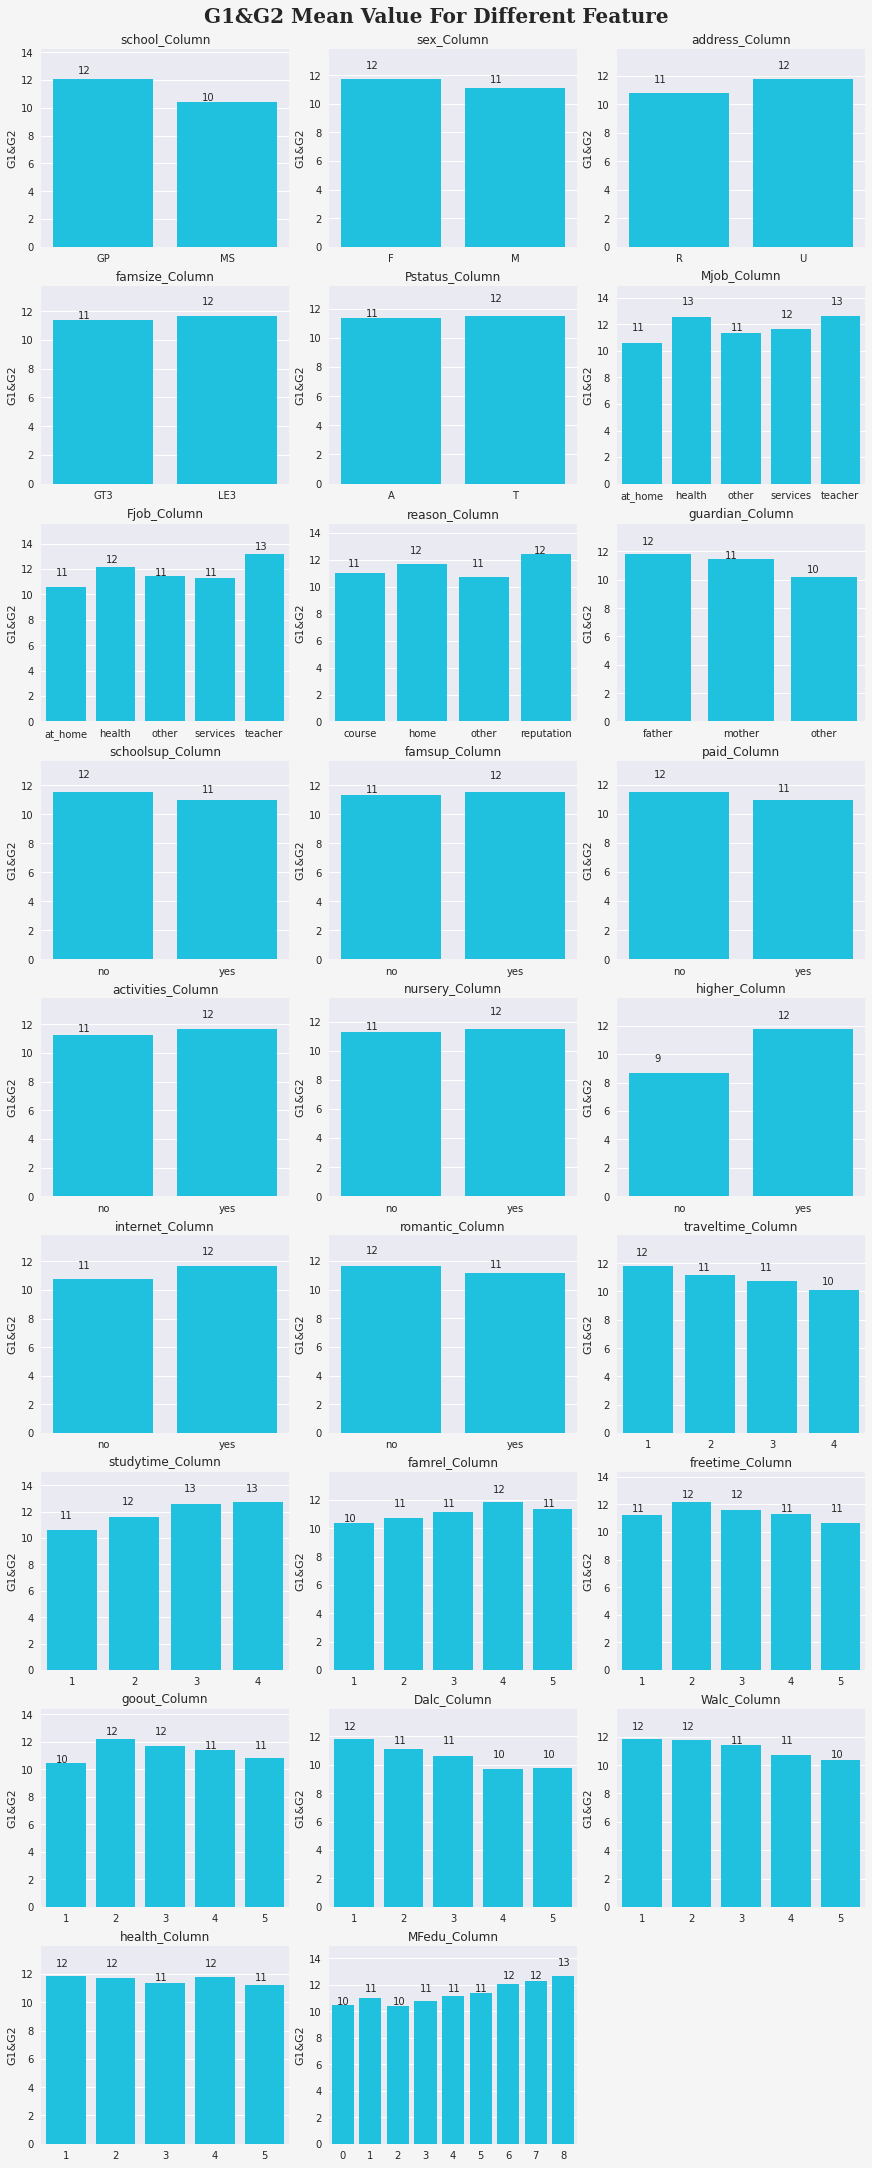

In [12]:
fig,axes = plt.subplots(9,3,figsize=(12,30),constrained_layout=True)
fig.suptitle('G1&G2 Mean Value For Different Feature',size=20, fontweight='bold', fontfamily='serif')
axes=axes.ravel()
axes[-1].remove()
for i in range(len(bi_cat_columns+bi_num_columns)):
    #Creating plotting data variables
    ax = axes[i]
    col = (bi_cat_columns+bi_num_columns)[i]
    plot_data = bi_df.groupby(col).mean()
    #plotting function
    sns.barplot(y='G1&G2', x=plot_data.index, data=plot_data, ax=ax, color=sns.color_palette('bright')[9])
    #Adjusting plot
    ax.set_xlabel("")
    ax.set_title(col+'_Column')
    ax.set_ylim(0,max(ax.get_ylim())+max(ax.get_ylim())/8)
    #writing percentage over each bar
    for p in ax.patches:
        x = p.get_x()+0.2
        y = round(p.get_height())
        ax.annotate(y,(x,y+0.5))

#### We can see some distribution difference from the exam score distribution, for example:
* **The exam mean value seems to have a inverse relationship with alcoholic consumption**
* **The exam mean increases with increasing study time and score distribution tend to shift slightly to the right**
* **The exam mean increases from other student if Mother of Father works as a teacher and score distribution tend to shift slightly to the right**
* **The distribution health shift to left (score decreases) if health of the student is worse**
* **The exam mean is worst if the guardian of the student is other than father or mother, there are some difference between guardian being the father and the mother, but the entries of father being the guardian is significantly smaller than the mother as most students have there mother as guardian**


# Multivariant Visualization

##### In this section my goal is to explore relationships of multiple columns with each other

In [13]:
#Creating different copy of the main dataframe to do my adjustment on it.
mu_df = df.copy()
mu_df['G1&G2'] = round((mu_df['G1'] + mu_df['G2'])/2,1)
mu_df['MFedu'] = mu_df['Medu'] + mu_df['Fedu']

mu_df.drop(labels=['G1','G2','Medu','Fedu'],inplace=True,axis=1)

#Updating my list of columns after the adjustments
mu_cat_columns = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian',
               'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
mu_num_columns = ['traveltime','studytime','famrel','freetime','goout','Dalc','Walc','health','MFedu']
mu_cont_columns = ['age','failures','absences','G3']

def exam_mean_facetgrid(df,face_column,x_col,mean_col='G1&G2',title='Forgotten!!'):
    '''
    df --> DataFrame
    face_column --> column name to be used in the FacetGrid main split
    x_col --> x-axis column name to be plotted in the FacetGrid object
    mean_col --> y-axis column name which where the mean value will be plottedd
    title --> Figure title to be displayed 
    
    Functions is designed to create sns.FacetGrid object with df and face_column as parameters
    then map plt.bar func with x_col and mean_col to the FacetGrid object.
    '''
    plot_data = df.groupby([x_col,face_column]).mean()[mean_col].reset_index()
    g=sns.FacetGrid(data=plot_data,col=face_column,margin_titles=True)
    g.map(plt.bar,x_col,mean_col)
    g.fig.subplots_adjust(top=0.8)
    g.fig.suptitle(f'{title}',size=12, fontweight='bold', fontfamily='serif')

**I'm curious how studytime and freetime affect student's score in exam, So I will create FacetGrid for different studytime value with x-axis for freetime value and y-axis equal to student's mean**

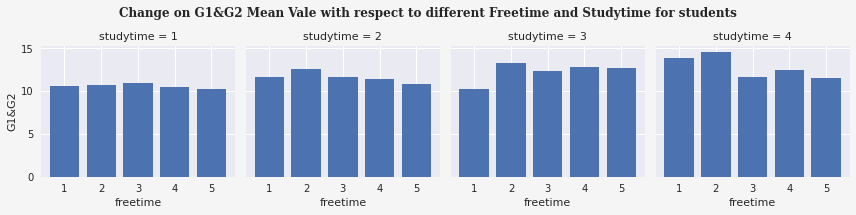

In [14]:
exam_mean_facetgrid(df=mu_df, face_column='studytime', x_col='freetime',title='Change on G1&G2 Mean Vale with respect to different Freetime and Studytime for students')

**Studing the exam means for different study time and free time is interesting, taking that if study time of 4 (which mean >10 hours) and have less free time do better in the exam than student's that study as much but has more free time which can infere one of 2 explanation:**
* As the value 4 is a little vague so the students don't study as much may be the students that have less free time may study more than students have more free time
* Students that have less free time may have hobbies or do activities which improve there performan

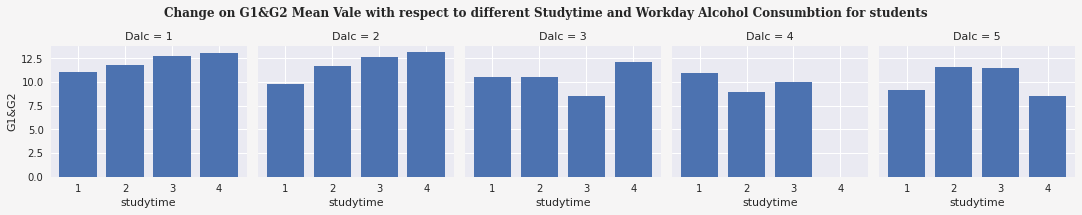

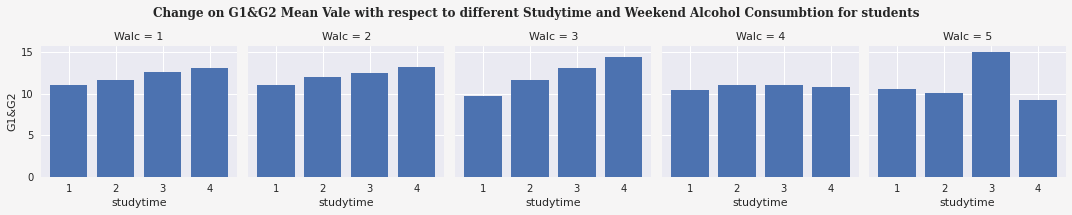

In [15]:
#for col in mu_num_columns+mu_cat_columns:
#    if col == 'studytime':
#        continue
#    exam_mean_facetgrid(mu_df,'studytime',col)

exam_mean_facetgrid(mu_df,x_col='studytime',face_column='Dalc',title='Change on G1&G2 Mean Vale with respect to different Studytime and Workday Alcohol Consumbtion for students')
exam_mean_facetgrid(mu_df,x_col='studytime',face_column='Walc',title='Change on G1&G2 Mean Vale with respect to different Studytime and Weekend Alcohol Consumbtion for students')

**As we have seen before that the exam score is inversely relation to alcoholic consumption we can investigate more about that relation with the above 2 plots which compare students mean score and studytime with alcoholic consumptions in weekdays and weekends.**

* **We can see that the heighest exam mean value were achived with the lowest weekday alcohol consumption (1&2). While the weekend consuption doesn't have strong trend we can see that the scores increases with studytime for same weekends alcohol consumption group**

#####  This data only has 649 rows which are considered too low to infer any global trends but fortunately, it has some strong trends within itself that we have discovered through our analysis and maybe there are more still hidden within the data. Feel free to tell me what you think and to explore the data from where I stopped
